# K-Nearest Neighbor

K-nearest neighbours is a non-linear instance-based learner used for classification and regression problems. It utilizes a distance based metric to identify similarity between datapoints. Predictions are made through a majority vote amongst the nearest neighbours of the instance.

The training process involves selecting the hyperparameter 'K'. The model then calculates the Euclidean distance between an instance and all other instances in the dataset. Once the K-nearest neighbours are identified, the model counts the number of neighbours within each category. For classification problems, the new observation is assigned to the category with the highest number of neighbours (or votes). For regression problems a prediction is made by computing the mean of the nearest neighbours.

Commonly used metrics for continuous variables are Manhattan and Euclidean distance while hamming distance is used for categorical variables.

   **Euclidean Distance = √[ (x2 – x1)^2 + (y2 – y1)^2]**
    
   **Manhatten Distance = √[ |x2 – x1| + |y2 – y1|]**
   

 
 # Pre-processing

-  Since KNN uses a distance based metric, it is important to perform feature scaling.

-  Choosing K is important. Smaller K's lead to low bias and high variance. K could be considered a hyperparameter that tunes the bias-variance tradeoff.

 #Pros and Cons
 
**Pros**
 
- Very easy to interpret the how the model makes predictions.

- It is nonparametric and non-linear and therefore works well for complex datasets.

**Cons**

-  KNN becomes extremely slow at making predictions as the size of the dataset increases. This is because it memorizes the training set and makes predictions by iterating over all pairs of points in the dataset.



# 1) Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# Import Data
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# 2) Preprocessing

In [22]:
# Create subsets of input features and response variable.
X = dataset.iloc[:, :-1].values
y = dataset['Purchased'].values

# Training and Testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 911)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('Standardized feature Mean:',  X_train.mean().round())
print('Standardized feature SD :',   X_train.std().round())

Standardized feature Mean: 0.0
Standardized feature SD : 1.0


In [4]:
# Training the K-NN model on the Training set
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75, cmap = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Model Evaluation

In [23]:
# Predicting a new result using age 40 and salary 87000
print(classifier.predict(sc.transform([[40,87000]])))
lgr.predict_proba(sc.transform([[40,87000]]))

# Predicting the Test set results
y_pred = knn.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Classification Accuracy
print('Classification Accuracy :', accuracy_score(y_test, y_pred), '%')

NameError: name 'classifier' is not defined

# Cross Validation

In [26]:
# 10 fold cross validation
accuracies = cross_val_score(estimator = classifier,
                             X = X,
                             y = y,
                             cv = 10,
                             scoring = 'accuracy')

# Cross validation accuracy and standard deviation
print(accuracies)
print("Accuracy: {:.3f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.3f} %".format(accuracies.std()*100))

NameError: name 'classifier' is not defined

# Hyperparametric Tuning



In [25]:
# Applying Grid Search to find the best parameters
knn = KNeighborsClassifier()

parameters = [{'n_neighbors': ['7', '11', '13', '21', '31'],
              'weights': ['uniform'],
              'metric': ['minkowski']}]

# Configure GridSearchCV
grid_search = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

# Initiate Search
grid_search.fit(X_train, y_train)


best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print("Best: %f using %s" % (grid_search.best_score_, grid_result.best_params_))

C:\Software\anaconda\envs\tf2.5.0\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
scores = cross_val_score(estimator = knn,
                             X = X,
                             y = y,
                             cv = 10,
                             scoring = 'accuracy')
    k_score.append(scores.mean())

[0.8049999999999999, 0.7875, 0.7900000000000001, 0.7925, 0.7849999999999999, 0.7825, 0.7925, 0.7875, 0.7875, 0.76, 0.78, 0.7850000000000001, 0.7899999999999999, 0.78, 0.7725000000000001, 0.7675, 0.7625, 0.7775000000000001, 0.77, 0.7725, 0.7700000000000001, 0.78, 0.7700000000000001, 0.7775000000000001, 0.7825000000000001, 0.7925000000000001, 0.785, 0.775, 0.77, 0.7775000000000001]


Text(0, 0.5, 'Cross-Validated Accuracy')

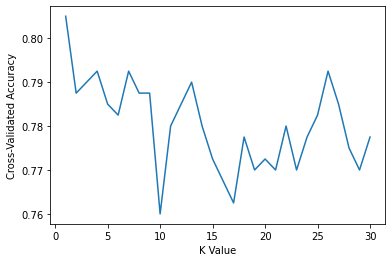

In [13]:
# Hyperparametric tuning
k_values = range(1,31)
k_score = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(estimator = knn,
                             X = X,
                             y = y,
                             cv = 10,
                             scoring = 'accuracy')
    k_score.append(scores.mean())

    
print(k_score)

#%matplotlib inline
plt.plot(k_values, k_score)
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')

In [144]:
# Confusion Matrix

def evaluate_model(lgr, X_test):
    
    y_pred = lgr.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)
    
    
    # ROC/AUC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, c = 'green',
                linewidth = 3,
                alpha = 0.75)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    
    
    # Visualising the Testing Results
    X_set, y_set = sc.inverse_transform(X_test), y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                         np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
    plt.contourf(X1, X2, lgr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i),edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75, label = j)
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

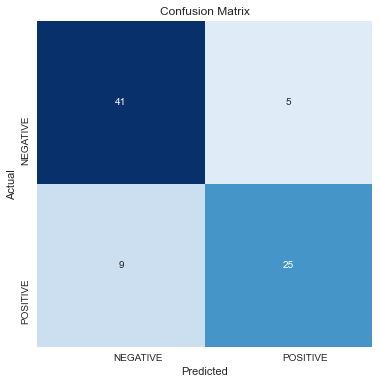

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.82      0.89      0.85        46
    POSITIVE       0.83      0.74      0.78        34

    accuracy                           0.82        80
   macro avg       0.83      0.81      0.82        80
weighted avg       0.83      0.82      0.82        80



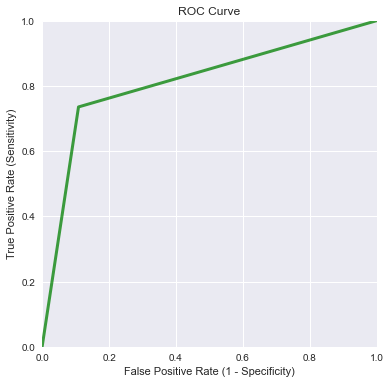

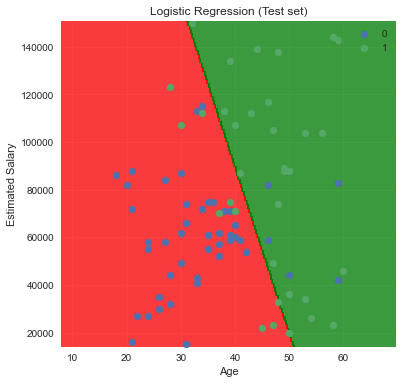

In [145]:
evaluate_model(lgr, X_test)

# Softmax Regression

In [88]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)
print(softmax_reg.predict(sc.transform([[40,87000]])))
softmax_reg.predict_proba(sc.transform([[40,87000]]))

[0]


array([[0.51073581, 0.48926419]])